In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

In [2]:
# Будем использовать только обучающую выборку
data_loaded = pd.read_csv('netflix_titles.csv', sep=",")

In [3]:
data_loaded.shape

(7787, 12)

In [4]:
data_loaded.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [5]:
data_features = list(zip(
# признаки
[i for i in data_loaded.columns],
zip(
    # типы колонок
    [str(i) for i in data_loaded.dtypes],
    # проверим есть ли пропущенные значения
    [i for i in data_loaded.isnull().sum()]
)))
# Признаки с типом данных и количеством пропусков
data_features

[('show_id', ('object', 0)),
 ('type', ('object', 0)),
 ('title', ('object', 0)),
 ('director', ('object', 2389)),
 ('cast', ('object', 718)),
 ('country', ('object', 507)),
 ('date_added', ('object', 10)),
 ('release_year', ('int64', 0)),
 ('rating', ('object', 7)),
 ('duration', ('object', 0)),
 ('listed_in', ('object', 0)),
 ('description', ('object', 0))]

In [6]:
# Используем только некоторые признаки
cols_filter = ['type', 'title', 'country', 'release_year']
data = data_loaded[cols_filter]
data.head()

,type,title,country,release_year
0,TV Show,3%,Brazil,2020
1,Movie,7:19,Mexico,2016
2,Movie,23:59,Singapore,2011
3,Movie,9,United States,2009
4,Movie,21,United States,2008


In [7]:
# Заполним пропуски
data.dropna(subset=['country'], inplace=True)

/Users/k.gadzhiev/projects/lr3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
# Отрезаем все страны, кроме первой
data.loc[:,('country')] = data['country'].str.split(',', expand=True)[0]

/Users/k.gadzhiev/projects/lr3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
data.tail()

,type,title,country,release_year
7781,Movie,Zoom,United States,2006
7782,Movie,Zozo,Sweden,2005
7783,Movie,Zubaan,India,2015
7785,TV Show,Zumbo's Just Desserts,Australia,2019
7786,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,United Kingdom,2019


In [10]:
# Убедимся что нет пустых значений
data.isnull().sum()

type            0
title           0
country         0
release_year    0
dtype: int64

In [11]:
data.shape

(7280, 4)

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(data['country'])

In [14]:
data['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland', 'Thailand', 'Nigeria', 'Norway',
       'United Kingdom', 'Japan', 'South Korea', 'Italy', 'Canada',
       'Indonesia', 'Romania', 'Spain', 'Iceland', 'South Africa',
       'France', 'Portugal', 'Hong Kong', 'Argentina', 'Germany',
       'Denmark', 'Kenya', 'New Zealand', 'Pakistan', 'Australia',
       'China', 'Taiwan', 'Netherlands', 'Philippines',
       'United Arab Emirates', 'Iran', 'Israel', 'Uruguay', 'Bulgaria',
       'Mauritius', 'Lebanon', 'Colombia', 'Soviet Union', 'Sweden',
       'Malaysia', 'Ireland', 'Serbia', 'Finland', 'Peru', 'Chile',
       'Ghana', 'Saudi Arabia', 'Namibia', 'Russia', 'Belgium', 'Vietnam',
       'Kuwait', 'Czech Republic', 'Zimbabwe', 'Hungary', 'Venezuela',
       'Cambodia', 'Austria', 'West Germany', 'Slovenia', 'Switzerland',
       'Jordan', 'Bangladesh', 'Georgia', 'Puerto Rico', 'Senegal',
       'Guatemala', 'Ukraine', 'Jamaica', 'Be

In [15]:
np.unique(cat_enc_le)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [16]:
le.inverse_transform([0, 1, 2, 3])

array(['Argentina', 'Australia', 'Austria', 'Bangladesh'], dtype=object)

In [18]:
data.loc[:,('country')] = cat_enc_le

/Users/k.gadzhiev/projects/lr3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [19]:
data

,type,title,country,release_year
0,TV Show,3%,6,2020
1,Movie,7:19,42,2016
2,Movie,23:59,60,2011
3,Movie,9,75,2009
4,Movie,21,75,2008
...,...,...,...,...
7781,Movie,Zoom,75,2006
7782,Movie,Zozo,67,2005
7783,Movie,Zubaan,28,2015
7785,TV Show,Zumbo's Just Desserts,1,2019


In [20]:
le.inverse_transform(data['country'])

array(['Brazil', 'Mexico', 'Singapore', ..., 'India', 'Australia',
       'United Kingdom'], dtype=object)

{'whiskers': [<matplotlib.lines.Line2D at 0x122620390>,
 'caps': [<matplotlib.lines.Line2D at 0x122620b50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1225fced0>],
 'medians': [<matplotlib.lines.Line2D at 0x122632450>],
 'fliers': [<matplotlib.lines.Line2D at 0x1226328d0>],
 'means': []}

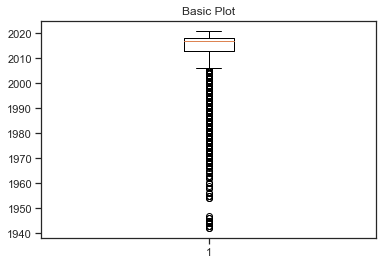

In [22]:
fig1, ax1 = plt.subplots()
ax1.set_title('Все работы')
ax1.boxplot(data['release_year'])

In [25]:
data_21century = data[data['release_year'] >= 2000]

In [26]:
data_21century.head()

,type,title,country,release_year
0,TV Show,3%,6,2020
1,Movie,7:19,42,2016
2,Movie,23:59,60,2011
3,Movie,9,75,2009
4,Movie,21,75,2008


{'whiskers': [<matplotlib.lines.Line2D at 0x122a185d0>,
 'caps': [<matplotlib.lines.Line2D at 0x122a2ecd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x122a20d50>],
 'medians': [<matplotlib.lines.Line2D at 0x122a2e250>],
 'fliers': [<matplotlib.lines.Line2D at 0x12288ad90>],
 'means': []}

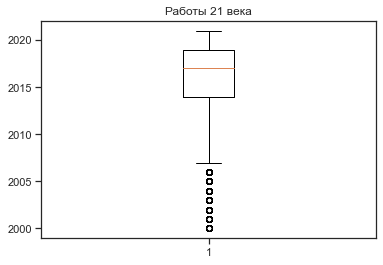

In [27]:
fig1, ax1 = plt.subplots()
ax1.set_title('Работы 21 века')
ax1.boxplot(data_21century['release_year'])